In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker


# Load data
data = pd.read_csv("C:/Users/akash/Documents/Coding Projects/CleanEnergyFundingF24/data/new/ZIP/njzip.csv")

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 20,
    'axes.titleweight': 'bold',
    'axes.labelsize': 16,
    'axes.labelweight': 'regular',
    'legend.fontsize': 12,
    'legend.title_fontsize': 16,  # Adjust legend title size
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

def format_num(num, pos, prefix=''):
    """Format numbers for x-axis and y-axis."""
    if num == 0:
        return '0'
    
    # check if num should be in millions or thousands
    if num >= 1e6:
        return prefix + f'{num/1e6:.0f}M'
    elif num >= 1e3:
        return prefix + f'{num/1e3:.0f}K'
    else:
        return prefix + str(num)

# Data preprocessing
data = data.iloc[:, 1:]
data['date'] = pd.to_datetime(data['date']).dt.to_period('M')
data['year'] = data['date'].dt.year.astype(str)
data['month'] = data['date'].dt.month.astype(str)
data['class'] = data['class'].astype(str)

data['ratio'] = data['awarded'] / data['cost']
data['vehicleCost'] = data['cost'] / data['numberOfVehicles']
data['vehiclesAwarded'] = data['awarded'] / data['numberOfVehicles']

# Group by class
class_summary = data.groupby('class').agg(
    total_vehicles=('numberOfVehicles', 'sum'),
    total_awarded=('awarded', 'sum'),
    total_cost=('cost', 'sum'),
    avg_cost_per_vehicle=('vehicleCost', 'mean'),
    avg_award_per_vehicle=('vehiclesAwarded', 'mean'),
    avg_award_to_cost_ratio=('ratio', 'mean')
).reset_index()

# Group by year
yearly_summary = data.groupby('year').agg(
    count=('numberOfVehicles', 'count'),
    total_vehicles=('numberOfVehicles', 'sum'),
    total_awarded=('awarded', 'sum'),
    total_cost=('cost', 'sum'),
    avg_cost_per_vehicle=('vehicleCost', 'mean'),
    avg_award_per_vehicle=('vehiclesAwarded', 'mean'),
    avg_award_to_cost_ratio=('ratio', 'mean')
).reset_index()

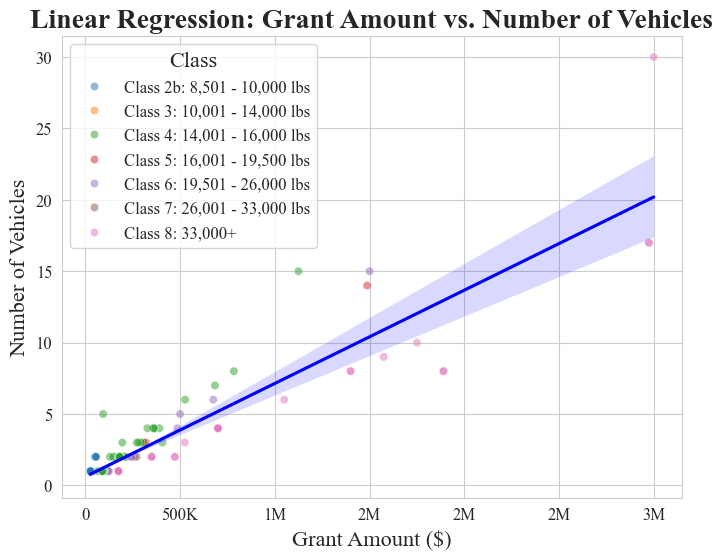

In [30]:

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='awarded', y='numberOfVehicles', hue='class', hue_order=sorted(data['class'].unique()), alpha=0.5)
sns.regplot(data=data, x='awarded', y='numberOfVehicles', scatter=False, color='blue', ci=80)
plt.title("Linear Regression: Grant Amount vs. Number of Vehicles")
plt.xlabel("Grant Amount ($)")
plt.ylabel("Number of Vehicles")
plt.legend(title='Class')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_num))
plt.savefig("graphs/scatter_plot.png")
plt.show()

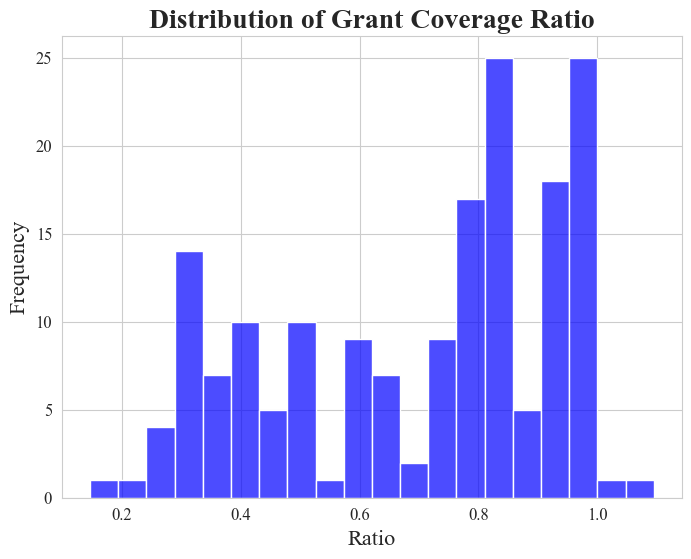

In [31]:


# Histogram of ratio
plt.figure(figsize=(8, 6))
sns.histplot(data['ratio'], bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Grant Coverage Ratio")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.savefig("graphs/distribution.png")
plt.show()


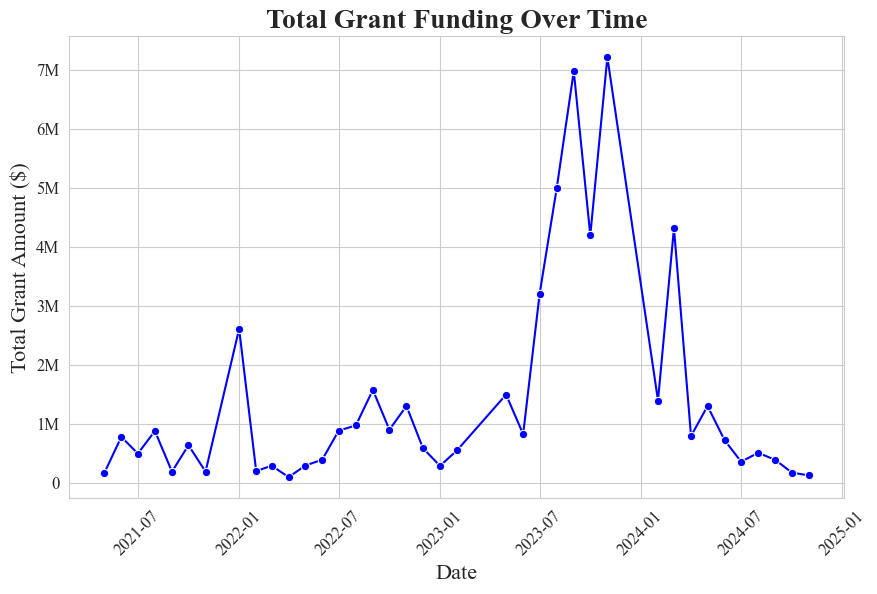

In [32]:


# Line plots for total grant funding over time
monthly_funding = data.groupby(['year', 'month']).agg(total_awarded=('awarded', 'sum')).reset_index()
monthly_funding['date'] = monthly_funding.apply(lambda row: datetime.strptime(f"{row['year']}-{row['month']}-01", "%Y-%m-%d"), axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_funding, x='date', y='total_awarded', marker='o', color='blue')
plt.title("Total Grant Funding Over Time")
plt.xlabel("Date")
plt.ylabel("Total Grant Amount ($)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_num))
plt.show()

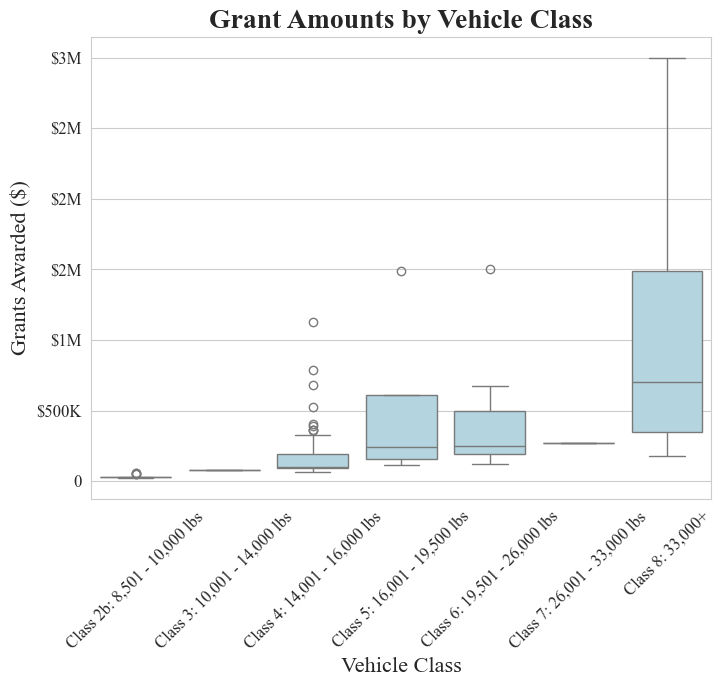

In [ ]:


# Boxplot for grant amount by vehicle class
plt.figure(figsize=(8, 6))

# sort the class in alphabetical order
data['class'] = pd.Categorical(data['class'], categories=sorted(data['class'].unique()), ordered=True)

sns.boxplot(data=data, x='class', y='awarded', color='lightblue')
plt.title("Grant Amounts by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Grants Awarded ($)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_num(x, None, prefix='$')))

# plt.savefig("graphs/vehicle_class.png")
plt.show()

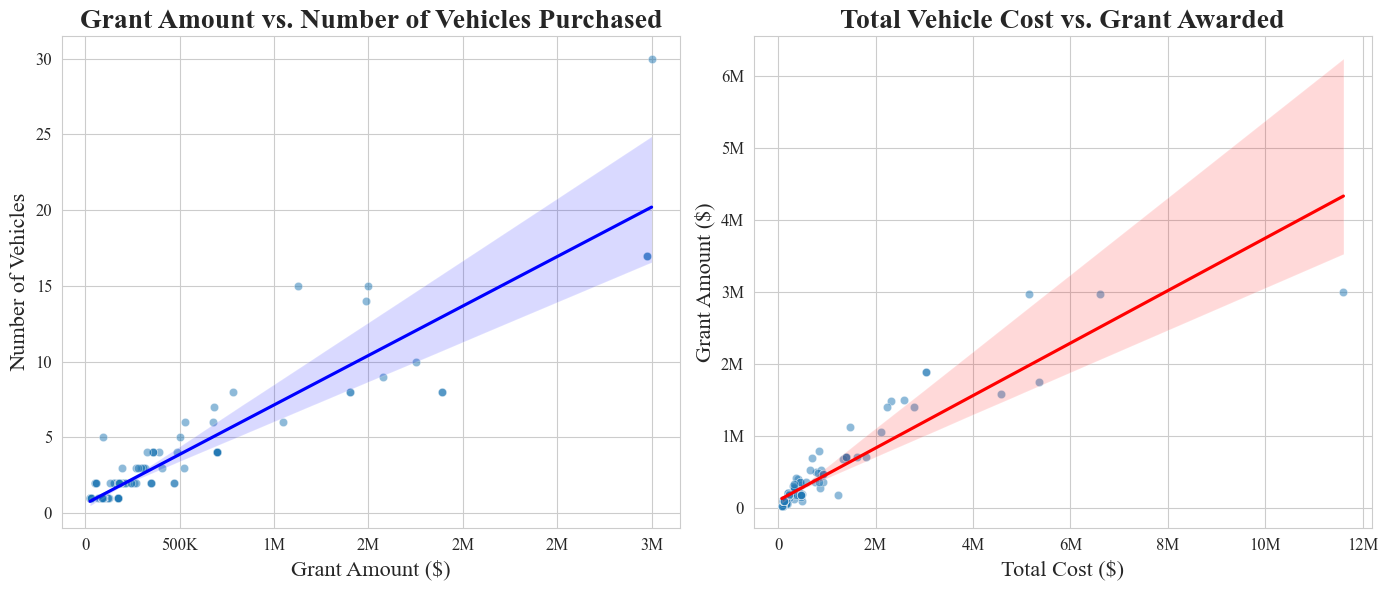

In [34]:



# Scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(ax=axes[0], data=data, x='awarded', y='numberOfVehicles', alpha=0.5)
sns.regplot(ax=axes[0], data=data, x='awarded', y='numberOfVehicles', scatter=False, color='blue')
axes[0].set_title("Grant Amount vs. Number of Vehicles Purchased")
axes[0].set_xlabel("Grant Amount ($)")
axes[0].set_ylabel("Number of Vehicles")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_num))

sns.scatterplot(ax=axes[1], data=data, x='cost', y='awarded', alpha=0.5)
sns.regplot(ax=axes[1], data=data, x='cost', y='awarded', scatter=False, color='red')
axes[1].set_title("Total Vehicle Cost vs. Grant Awarded")
axes[1].set_xlabel("Total Cost ($)")
axes[1].set_ylabel("Grant Amount ($)")
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_num))
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_num))

plt.tight_layout()
plt.savefig("graphs/both.png")
plt.show()


In [35]:
data.describe()

,awarded,cost,numberOfVehicles,ratio,vehicleCost,vehiclesAwarded
count,1.720000e+02,1.720000e+02,172.000000,172.000000,172.000000,172.000000
mean,3.107549e+05,5.851887e+05,2.639535,0.698402,167937.138366,102339.486434
std,5.018365e+05,1.271126e+06,3.560382,0.241181,115672.556536,42672.474035
min,2.500000e+04,7.550000e+04,1.000000,0.146174,75500.000000,18750.000000
25%,9.295000e+04,1.109000e+05,1.000000,0.499471,99500.000000,90350.000000
50%,1.500000e+05,1.990000e+05,2.000000,0.789534,110900.000000,97750.000000
75%,2.605500e+05,4.480090e+05,2.000000,0.917493,165651.375000,101750.000000
max,3.000000e+06,1.160700e+07,30.000000,1.094969,615704.500000,236250.000000


In [36]:
# write the sum of each column and print it
print("Sum of each column:")
print(data.sum(numeric_only=True))
print("Sum of each column by class:")
print(data.groupby('class').sum(numeric_only=True))

Sum of each column:
awarded             5.344985e+07
cost                1.006525e+08
numberOfVehicles    4.540000e+02
ratio               1.201251e+02
vehicleCost         2.888519e+07
vehiclesAwarded     1.760239e+07
dtype: float64
Sum of each column by class:
                                 awarded        cost  numberOfVehicles  \
class                                                                    
Class 2b: 8,501 - 10,000 lbs    570200.0   1857800.0                21   
Class 3: 10,001 - 14,000 lbs     76400.0    132750.0                 1   
Class 4: 14,001 - 16,000 lbs  19136500.0  24651461.0               210   
Class 5: 16,001 - 19,500 lbs   2090850.0   3224500.0                20   
Class 6: 19,501 - 26,000 lbs   4330900.0   8213423.4                40   
Class 7: 26,001 - 33,000 lbs    270000.0    850000.0                 2   
Class 8: 33,000+              26975000.0  61722516.5               160   

                                  ratio   vehicleCost  vehiclesAwarded 

C:\Users\akash\AppData\Local\Temp\ipykernel_10352\1921005204.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('class').sum(numeric_only=True))
